In [52]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1
**Unit norm ball:** Recall the definition of of a unit norm ball from class that we defined in a normed linear
space $(X, || . || )$: <br>
B̄ = { x ∈ $X$ : || x || ≤ 1 }. Assume $X = \mathbb{R}^2$.


**(a)** Write a function that accepts $p$ and plots the $|| . ||_p$ unit norm ball. Test with integer $p \geq 1$ as well
as $0 < p < 1$.

In [53]:
def plot_unit_norm_ball(p, color = "blue", **kwargs):
	"""
	Plots the unit norm ball for the given p-norm.
	"""
	plt.axis([-1.3, 1.3, -1.3, 1.3])
	plt.grid(True)
	plt.gca().set_aspect("equal")

	# Plot the x-y axes
	plt.plot([-1.3, 1.3], [0, 0], color="black", linewidth=1)
	plt.plot([0, 0], [-1.3, 1.3], color="black", linewidth=1)

	# Plot the unit norm ball boundary
	x1 = np.linspace(-1, 1, 555)
	x2 = (1 - np.abs(x1)**p)**(1/p)
	plt.plot(x1, x2, label = "p = {}".format(p), color = color, **kwargs)
	plt.plot(x1, -x2, color = color, **kwargs)
	plt.legend()

	# Plot the unit norm ball interior
	plt.fill_between(x1, x2, -x2, color = color, alpha = 0.2, **kwargs)

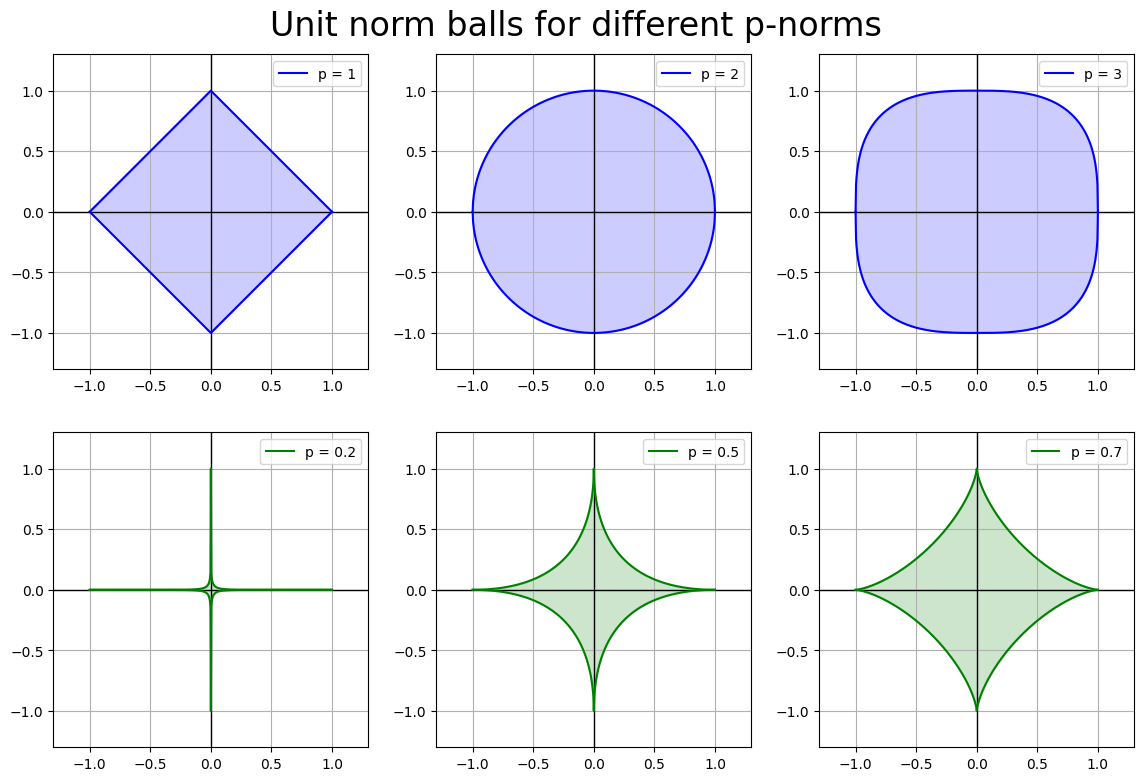

In [54]:
plt.figure(figsize=(14, 9))
plt.suptitle("Unit norm balls for different p-norms", fontsize = 24, y = 0.93)

# Plot the unit norm balls for integers p >= 1
for p, subplot in zip([1, 2, 3], range(1, 4)):
	plt.subplot(2, 3, subplot)
	plot_unit_norm_ball(p, color = "blue")

# Plot the unit norm balls for 0 < p < 1
for p, subplot in zip([0.2, 0.5, 0.7], range(4, 7)):
	plt.subplot(2, 3, subplot)
	plot_unit_norm_ball(p, color = "green")

plt.show()

**(b)** We claimed that for integer $p \geq 1$ the unit ball is convex. Is this clear from the unit norm ball plots? What happens when $0 < p < 1$? Print your observations.

We can see that for p >= 1, the line segment joining any two points in the unit norm ball lies completely 
inside the unit norm ball. Hence the unit norm ball is convex for p >= 1.

However, for 0 < p < 1, the norm ball is not convex as the line segment joining any two points in the unit 
norm ball does not lie completely inside the unit norm ball. For example, consider the line joining the 
points (1, 0) and (0, -0.5) for p = 0.5, which lies outside the unit norm ball.



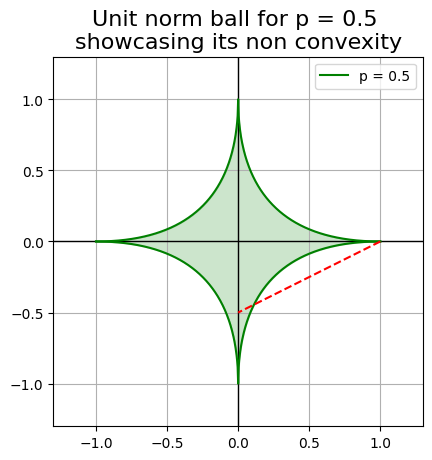

In [55]:
print("We can see that for p >= 1, the line segment joining any two points in the unit norm ball lies completely \ninside the unit norm ball. Hence the unit norm ball is convex for p >= 1.\n")

print("However, for 0 < p < 1, the norm ball is not convex as the line segment joining any two points in the unit \nnorm ball does not lie completely inside the unit norm ball. For example, consider the line joining the \npoints (1, 0) and (0, -0.5) for p = 0.5, which lies outside the unit norm ball.\n")

plot_unit_norm_ball(0.5, color = "green")
plt.title("Unit norm ball for p = 0.5 \nshowcasing its non convexity", fontsize = 16)
plt.plot([1, 0], [0, -0.5], color = "red", label = "Line not completely inside the unit norm ball", linestyle = "--")
plt.show()

### Question 2
**Completeness:** Recall from class that a metric space $(X, d)$ is said to be complete if all Cauchy sequences in $X$ converge to a point in $X$. Show with a numerical example that the space of continuous functions defined on the closed interval $[0, 1]$ and denoted $C[ 0, 1]$ is incomplete with respect to the metric derived from the $L1$ norm (i.e., $d(f, g) = || f − g ||_1 = \int_0^1 |f(x) − g(x)|dx$ for any $f, g \in C[ 0, 1]$).

Code your example and demonstrate the result either using a plot or numerically.

#### Example
Let $f_n(x) = (1-x)^n$ for $n \in \mathbb{N}$. Clearly $f_n \in C[0,1]$ for all $n \in \mathbb{N}$. <br> <br>
We can observe that $f_n$ is a Cauchy sequence in $C[0,1]$, i.e., $||f_n - f_m||_1 \rightarrow 0$ as $n, m \rightarrow \infty$. <br><br>

Also let 
$
f(x) = \begin{cases}
    1 & \quad \text{if } x = 0 \\
    0 & \quad \text{if } x \in (0,1]
\end{cases}.
$ Clearly $f$ is discontinuous at $x = 0$ and hence $f \notin C[0,1]$. <br> <br>

We claim that $f_n \rightarrow f$ as $n \rightarrow \infty$, which we programatically show below using the $L1$ norm, i.e., $||f_n - f||_1 \rightarrow 0$ as $n \rightarrow \infty$. <br><br>

Hence $C[0,1]$ is incomplete with respect to the $L1$ norm as we have a Cauchy sequence $f_n$ in $C[0,1]$ that does not converge to a point in $C[0,1]$.

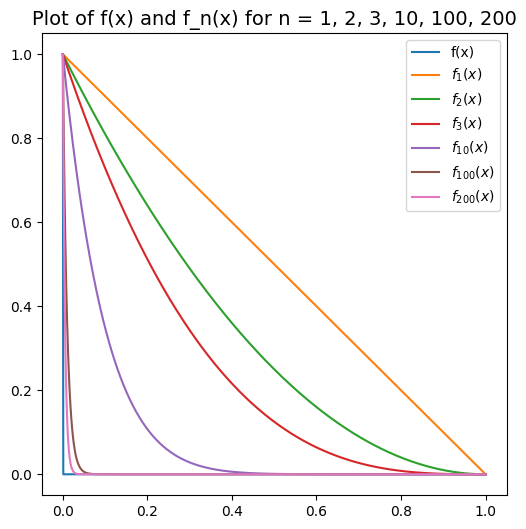

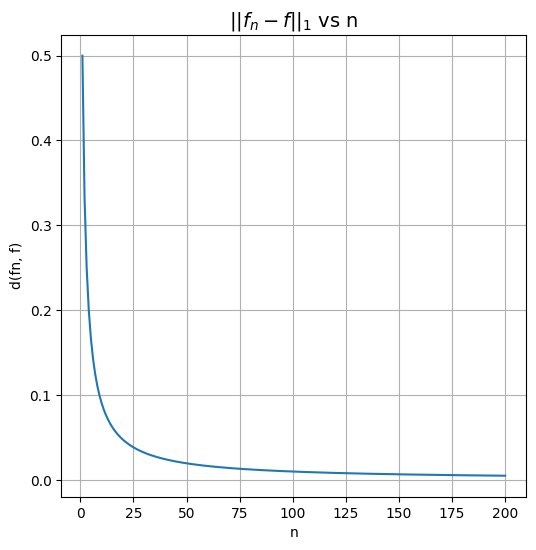

In [56]:
def f_n(x: float, n: int):
	assert n >= 1 and 0 <= x <= 1, "Invalid input"
	return (1 - x) ** n

def f(x: float):
	assert 0 <= x <= 1, "Invalid input"
	if x == 0: return 1
	else: return 0

def L1_norm(f: callable, g: callable):
	"""
	Returns the L1 norm of the function f - g. We approximate the integral using summation over a large number of points.
	"""
	N = 10001
	X = np.linspace(0, 1, N)
	return np.sum(np.array([np.abs(f(x) - g(x)) for x in X])) / N

def fn_distance_from_f(n: int):
	"""
	Returns the L1 norm of the function f_n - f.
	"""
	return L1_norm(lambda x: f_n(x, n), f)

# Plot f_n(x) for n = 1, 2, 3, 10, 100 and f(x)
N = [1, 2, 3, 10, 100, 200]
plt.figure(figsize=(6, 6))
plt.title("Plot of f(x) and f_n(x) for n = 1, 2, 3, 10, 100, 200", fontsize = 14)
X = np.linspace(0, 1, 1001)
plt.plot(X, [f(x) for x in X], label = "f(x)")
for n in N:
	plt.plot(X, [f_n(x, n) for x in X], label = f"$f_{{{n}}}(x)$")
plt.legend()
plt.show()

# Plot the L1 norm of f_n(x) - f(x) as a function of n
N = np.arange(1, 201)
plt.figure(figsize=(6, 6))
plt.title(f"$||f_n - f ||_1$ vs n", fontsize = 14)
plt.plot(N, [fn_distance_from_f(n) for n in N], label = f"$||f_n - f ||_1$")
plt.xlabel("n")
plt.ylabel("d(fn, f)")
plt.grid(True)
plt.show()

### Question 3
**Entropy of a discrete RV:** Recall the definition of entropy of a discrete RV $X$ from class, $H(X) = - \sum_{x \in \mathbb{X}} p(x) \log p(x)$, where $p(x)$ is the probability mass function (PMF) of $X$, and $\mathbb{X}$ is the set of possible values that the random variable $X$ can take. 

**(a)** Write a function that accepts a PMF as input and outputs the entropy in bits. Do check for the
condition of a value being assigned zero probability.

In [57]:
def get_entropy(p: np.array):
	"""
	Returns the entropy of a random variable X with probability mass function p.
	"""
	p = p[p > 0] # Remove all zero probabilities
	return -np.sum(p * np.log2(p))

**(b)** Now use the above function to plot the entropy of $X$ ∼ Bern ($p$) as a function of $p$. Where does
this plot attain its maximum?

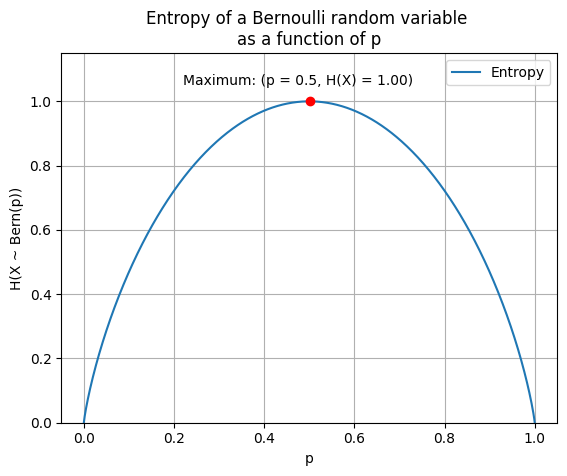

In [58]:
# Compute the entropy of a Bernoulli random variable as a function of p
p = np.linspace(0, 1, 1000) # Probability of success
pmf = np.array([p, 1 - p]) # Probability mass function
H_x = np.apply_along_axis(get_entropy, 0, pmf) # Entropy

# Plotting the entropy
plt.plot(p, H_x, label = "Entropy")
plt.title("Entropy of a Bernoulli random variable \nas a function of p")
plt.xlabel("p")
plt.ylabel("H(X ~ Bern(p))")
plt.ylim(0, 1.15)
plt.grid(True)
plt.legend()

# Get the maximum entropy and the corresponding p
max_entropy = np.max(H_x)
max_entropy_p = p[np.argmax(H_x)]
plt.plot(max_entropy_p, max_entropy, "ro")
plt.annotate(f"Maximum: (p = {max_entropy_p:.1f}, H(X) = {max_entropy:.2f})", (max_entropy_p, max_entropy), xytext = (max_entropy_p - 0.28, max_entropy + 0.05))
plt.show()

### Question 4
**Image Entropy:** Download a gray scale image from the link provided in the instructions. By gray
scale is meant that the image has one intensity channel. Further, the pixel intensities are in the range
[0, 255].

**(a)** Write a function that accepts an image as input and returns its normalized histogram. Note that
the normalized histogram is found by dividing the original histogram by the total number of
pixels in the image.

In [59]:
# Utility code to help read the grayscale image from the given url or local path

from PIL import Image
import requests

def get_image(url: str, local = True, greyscale = False):
	"""
	Returns the image as an np.array from the given url.
	"""
	if local: img = Image.open(url)
	else: img = Image.open(requests.get(url, stream = True).raw)

	if greyscale: img = img.convert("L") # Convert to grayscale
	return np.array(img)

In [60]:
def get_normalized_histogram(img: np.array):
	"""
	Returns the normalized histogram of the given grayscale image.
	"""
	hist = np.zeros(256)
	for i in range(img.shape[0]):
		for j in range(img.shape[1]):
			hist[img[i][j]] += 1
	
	return hist / (img.shape[0] * img.shape[1]) # Normalize the histogram

**(b)** Use your entropy function from the previous problem to find the image entropy. Experiment
with different gray scale images from the aforementioned link and note your observations.

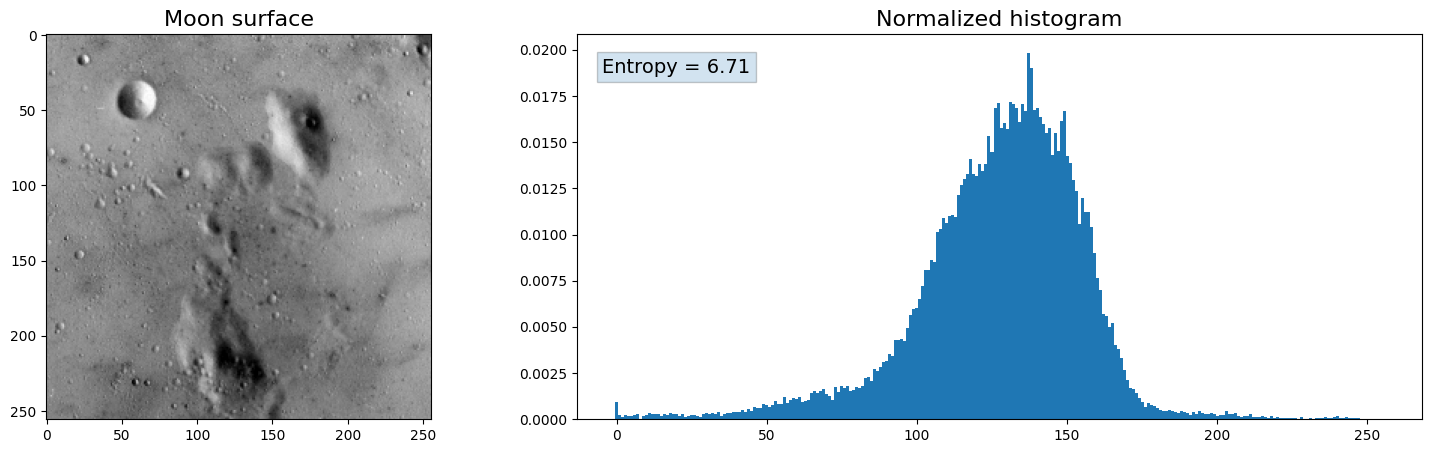

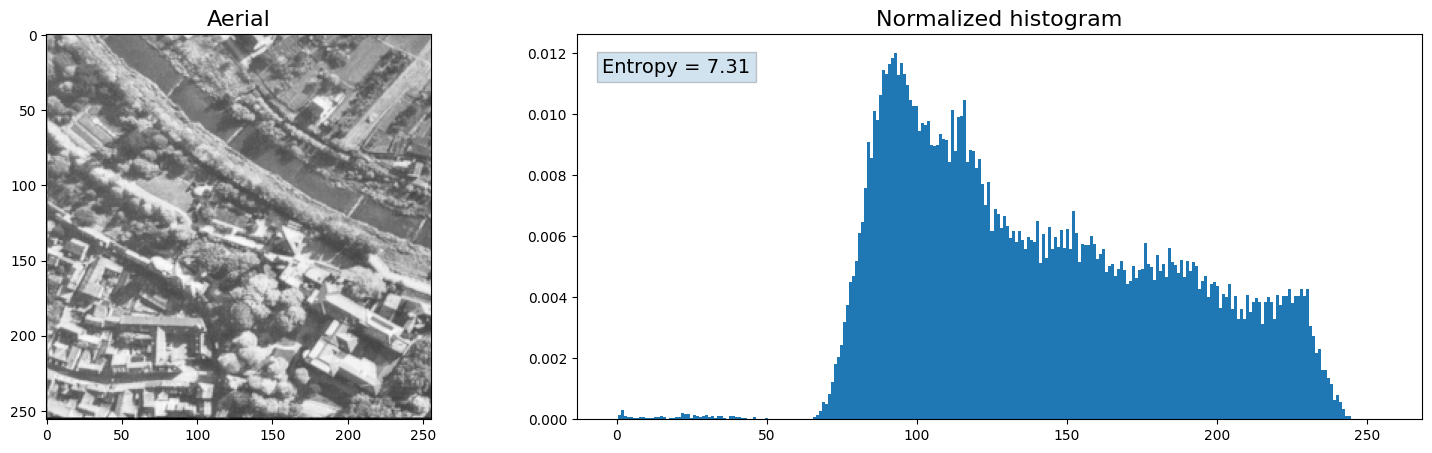

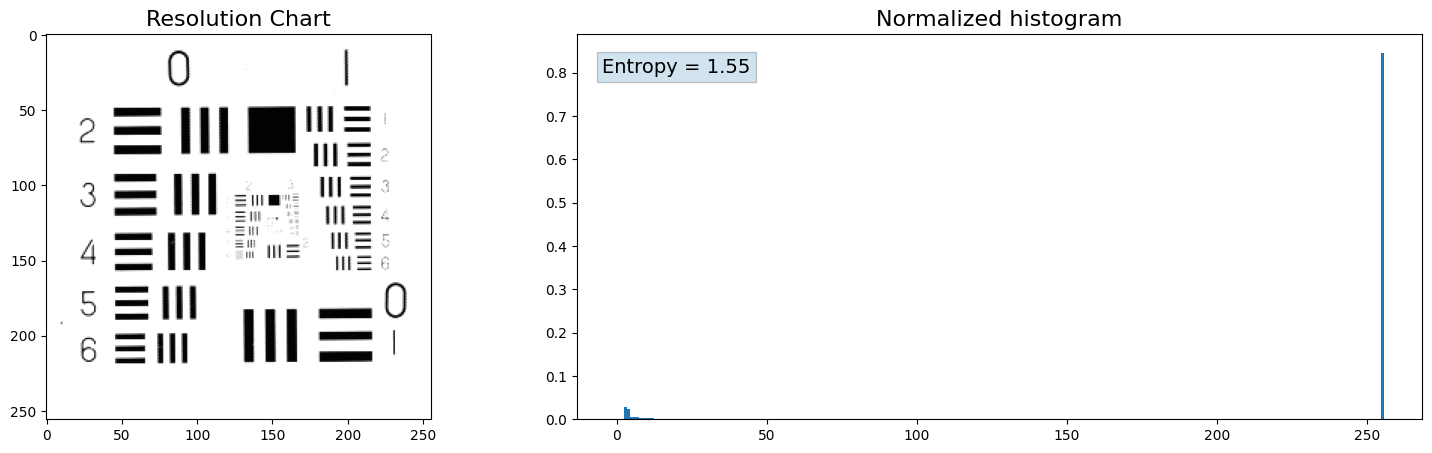

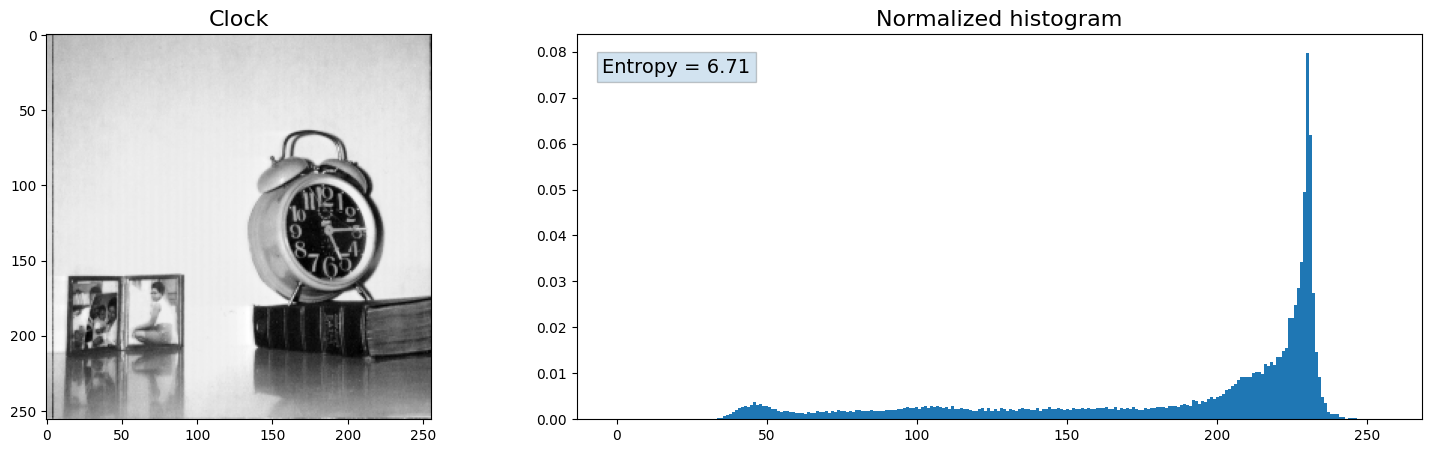

In [61]:
local = False # Change this to True if you want to work with downloaded images (Also change the image paths below include .tiff extension)
url_remote = "https://sipi.usc.edu/database/download.php?vol=misc&img="
test_images = [("5.1.09", "Moon surface"), ("5.1.10", "Aerial"), ("5.1.13", "Resolution Chart"), ("5.1.12", "Clock")]

# Plot the images and their normalized histograms and compute their entropies
for image, title in test_images:
	# Read the image
	if not local: image = url_remote + image
	img = get_image(image, local = local, greyscale = True)
	plt.figure(figsize = (18, 5))
	gs = plt.GridSpec(1, 2, width_ratios=[1, 2])

	# Display the grayscale image
	plt.subplot(gs[0])
	plt.title(title, fontsize = 16)
	plt.imshow(img, cmap = "gray")

	# Plot the normalized histogram
	plt.subplot(gs[1])
	plt.title(f"Normalized histogram", fontsize = 16)
	noramlized_histogram = get_normalized_histogram(img)
	plt.bar(np.arange(256), noramlized_histogram, width = 1)

	# Compute and display the entropy
	entropy = get_entropy(noramlized_histogram)
	plt.text(0.03, 0.9, f"Entropy = {entropy:.2f}", fontsize = 14, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	plt.show()



In [62]:
# Observations
print("We can see that the images with a lot of details/texture (more spread out histogram) have higher entropy than the images with less texture/more constant color.")

We can see that the images with a lot of details/texture (more spread out histogram) have higher entropy than the images with less texture/more constant color.


### Question 5
**Joint PMF and joint entropy:** For this problem, work with the given stereo image pair labeled
left.png and right.png respectively. As in the previous question, both images are gray scale.

**(a)** Write a function that accepts this stereo image pair as input, and outputs the normalized joint
histogram in addition to plotting it.

In [63]:
def get_normalized_joint_histogram(image_1: np.array, image_2: np.array):
	"""
	Returns the normalized joint histogram of the given grayscale images.
	"""
	assert image_1.shape == image_2.shape, "The images must have the same shape"
	hist = np.zeros((256, 256))
	for i in range(image_1.shape[0]):
		for j in range(image_1.shape[1]):
			hist[image_1[i][j]][image_2[i][j]] += 1
	
	return hist / (image_1.shape[0] * image_1.shape[1]) # Normalize the joint histogram

In [64]:
def plot_joint_histogram(joint_histogram: np.array):
	"""
	Plots the given joint histogram as a 3-D histogram  
	"""
	# Create 2D arrays for X and Y coordinates
	x_coords, y_coords = np.meshgrid(np.arange(256), np.arange(256))
	
	# Create a 3D figure
	fig = plt.figure(figsize=(11, 6))
	ax = fig.add_subplot(111, projection='3d')
	ax.set_title("Joint histogram of the two images", fontsize = 16, y = 1.05, fontweight = "bold")

	# Flatten the joint histogram for the Z coordinate
	z_values = joint_histogram.flatten()

	# Plot the 3D histogram
	ax.bar3d(x_coords.ravel(), y_coords.ravel(), np.zeros_like(z_values), 1, 1, z_values, color = "C2", alpha = 0.5)

	# Set axis labels
	ax.set_xlabel('Pixel Values in Image 1')
	ax.set_ylabel('Pixel Values in Image 2')
	ax.set_zlabel('Probability')

	# Show the plot
	plt.show()

In [65]:
# Function for 5(a)
def plot_and_output_normalized_joint_histogram(image_1: np.array, image_2: np.array):
	"""
	Plots the normalized joint histogram of the given grayscale images and outputs it.
	"""
	joint_histogram = get_normalized_joint_histogram(image_1, image_2)
	plot_joint_histogram(joint_histogram)
	return joint_histogram

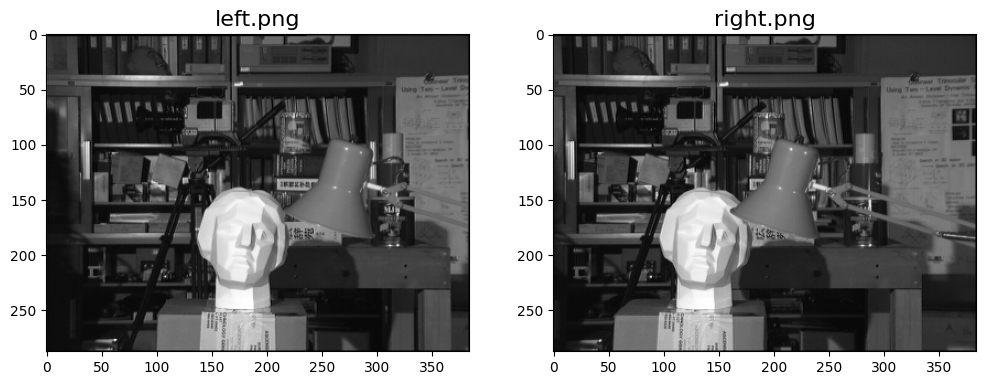

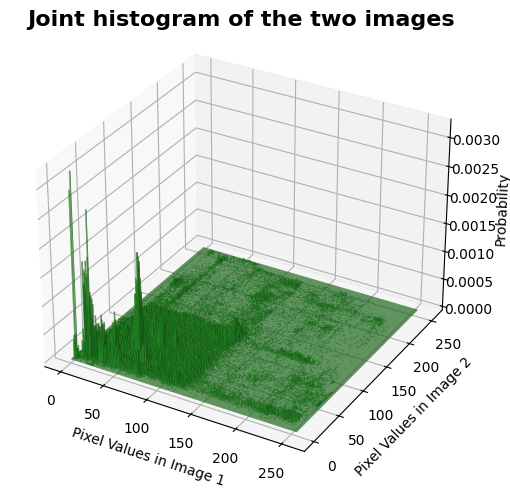

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.80844907e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.43605324e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [66]:
# Load the images
image_1 = get_image("left.png", greyscale = True)
image_2 = get_image("right.png", greyscale = True)

# Display the images
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title("left.png", fontsize = 16)
plt.imshow(image_1, cmap = "gray")
plt.subplot(1, 2, 2)
plt.title("right.png", fontsize = 16)
plt.imshow(image_2, cmap = "gray")

# Plot the normalized joint histogram
plot_and_output_normalized_joint_histogram(image_1, image_2)

**(b)** Write a function that accepts the joint PMF of a pair of random variables as input and outputs
the joint entropy.

In [67]:
def get_joint_pmf_entropy(joint_pmf: np.array):
	"""
	Returns the entropy of the given 2D joint probability mass function.
	"""
	return get_entropy(joint_pmf.flatten()) # Flatten the joint pmf and compute the entropy

**(c)** Test your joint entropy function using the normalized joint histogram computed in Problem 5(a)

In [68]:
joint_normalized_hist = get_normalized_joint_histogram(image_1, image_2)
joint_entropy = get_joint_pmf_entropy(joint_normalized_hist)

print(f"The joint entropy of the two images is {joint_entropy:.3f} bits.")

The joint entropy of the two images is 13.675 bits.


### Question 6
**Conditional PMF and conditional entropy:** Continue to work with the stereo image pair.

**(a)** Write a function that accepts as input the joint PMF of a pair of random variables, the index of the
conditioning random variable, and the value of the conditioning random variable. The function
must output the appropriate conditional PMF.

In [69]:
def get_conditional_pmf(p_xy: np.array, given_rv: int, given_value: int):
	"""
	Returns the conditional probability mass function of the given random variable given the value of the other random variable.
	"""
	if given_rv == 0: # p(y | x = given_value)
		return p_xy[given_value] / np.sum(p_xy[given_value]) 
	else: # p(x | y = given_value)
		return p_xy[:, given_value] / np.sum(p_xy[:, given_value])

**(b)** Write a function that accepts as input the joint PMF and the index of the conditioning RV, and
outputs the conditional entropy.

In [70]:
def get_conditional_entropy(joint_pmf: np.array, given_rv: int, given_value: int):
	"""
	Returns the conditional entropy of the given random variable given the value of the other random variable.
	"""
	conditional_pmf = get_conditional_pmf(joint_pmf, given_rv, given_value)
	return get_entropy(conditional_pmf)

**(c)** Test your conditional entropy function using the normalized joint histogram computed in Problem 4 (a), for your choice of the conditioning RV.

In [71]:
py_x0 = get_conditional_pmf(joint_normalized_hist, 0, 0)
px_y0 = get_conditional_pmf(joint_normalized_hist, 1, 0)

print(f"The conditional entropy of Y given X = 0 is {get_conditional_entropy(joint_normalized_hist, 0, 0):.3f} bits.")
print(f"The conditional entropy of X given Y = 0 is {get_conditional_entropy(joint_normalized_hist, 1, 0):.3f} bits.")

The conditional entropy of Y given X = 0 is 2.969 bits.
The conditional entropy of X given Y = 0 is 2.236 bits.


### Question 7
**KL Divergence:** We showed in class that for PMFs $p$ and $q$ defined on $X$, $D(p||q) \geq 0, D(q||p) \neq D(p||q)$. This problem explores these properties experimentally.

**(a)** Write a function that accepts as input two PMFs p and q as input, and outputs $D(p||q)$.

In [72]:
def get_kl_divergence(p: np.array, q: np.array):
	"""
	Returns the KL divergence of the given probability mass functions.
	"""
	assert p.shape == q.shape, "The probability mass functions must have the same shape"
	assert np.all((p > 0) == (q > 0))

	p = p[p > 0] # Remove all zero probabilities
	q = q[q > 0] # Remove all zero probabilities

	return np.sum(p * np.log2(p / q)) # Compute the KL divergence

**(b)** As discussed in class, let $p$ ∼ Bern ($r$) and $q$ ∼ Bern ($s$). For a fixed value of $r$, vary $s$ and do the
following:

**i.** Plot $D(p||q)$, $D(q||p)$.

**ii.** Verify that $D(p||q), D(q||p)$ are indeed non-negative

**iii.** Verify that $D(p||q) \neq D(q||p)$ and are both equal to zero only when $r = s$.

In [73]:
def plot_kl_divergence_for_bernouli(r: float):
	"""
	Plots D(p||q) and D(q||p) for bernoili R.V.s p ~ Bern (r) and q ~ Bern (s), where r is fixed and s varies from 0 to 1.
	"""
	s = np.linspace(0.001, 0.999, 1001) # Probability of success for q

	p = np.array([r, 1 - r]) # Probability mass function for p
	q = np.array([np.array([s_i, 1 - s_i]) for s_i in s]) # Probability mass function for q (for each s

	# Compute the KL divergences
	D_pq = np.array([get_kl_divergence(p, q_i) for q_i in q])
	D_qp = np.array([get_kl_divergence(q_i, p) for q_i in q])

	# Plot the KL divergences
	plt.plot(s, D_pq, label = "D(p||q)")
	plt.plot(s, D_qp, label = "D(q||p)")
	plt.title(f"{r = :.2f}", fontsize = 16)
	plt.xlabel("s")
	plt.ylabel("KL divergence")
	plt.gca().axvline(r, ls='-.', label="r", color = "purple")
	plt.grid(True)
	plt.legend()

	return s, D_pq, D_qp

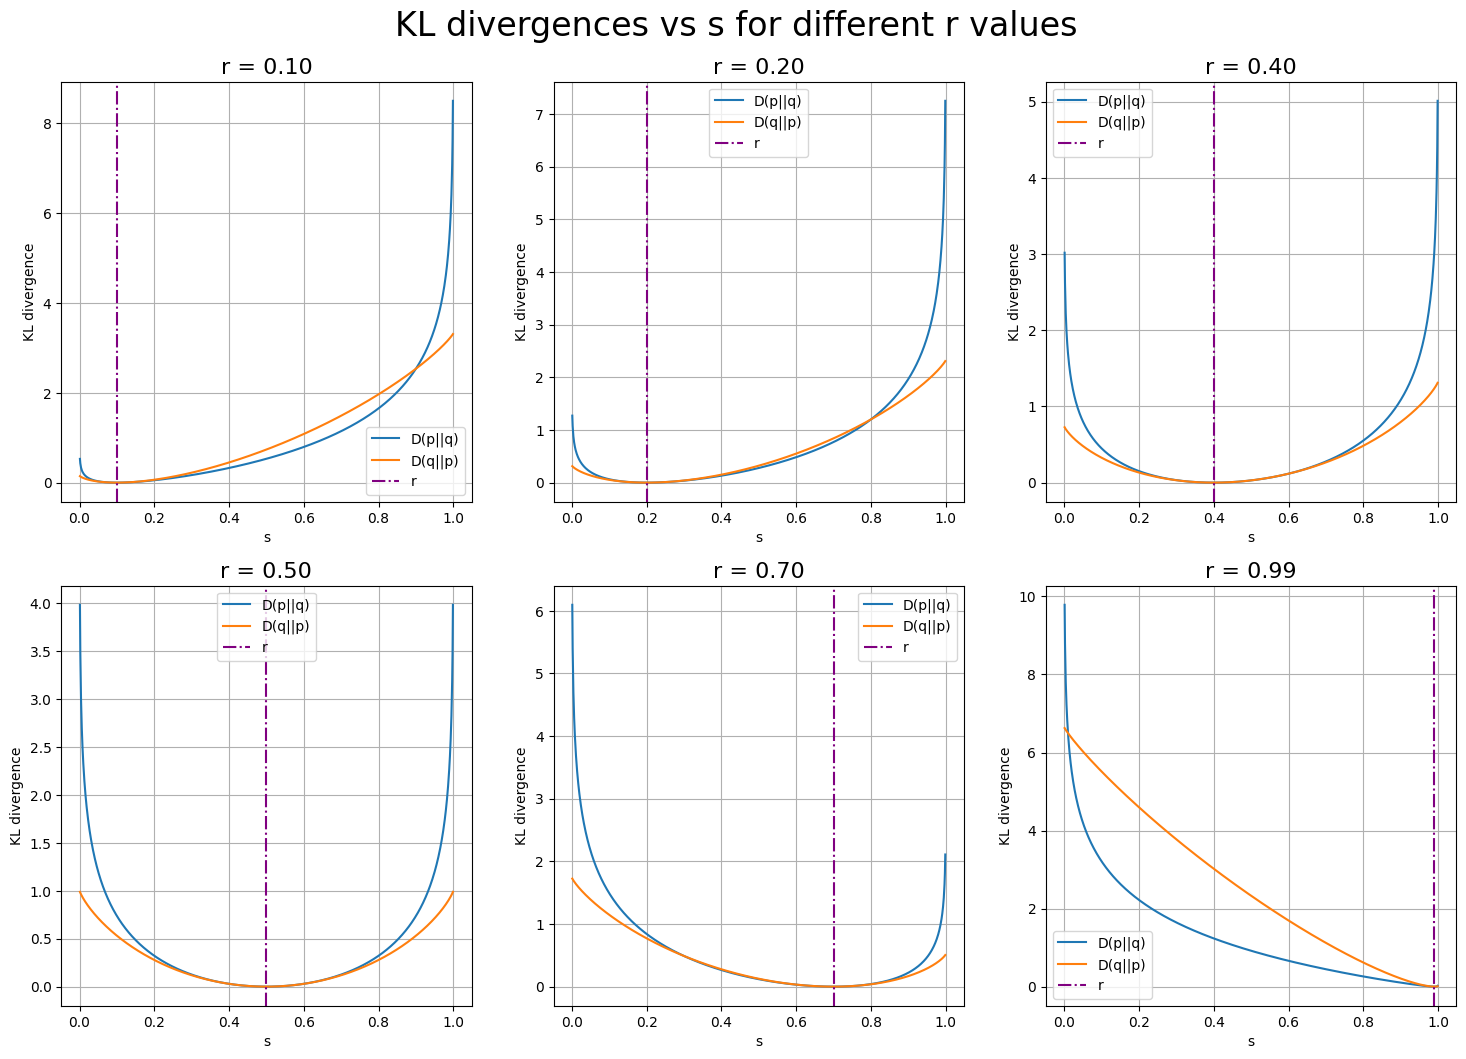

In [74]:
test_rs = [0.1, 0.2, 0.4, 0.5, 0.7, 0.99]
eps = 1e-3 # Tolerance for floating point comparisons

# Plot the KL divergences for the given test r values
plt.figure(figsize = (18, 12))
plt.suptitle("KL divergences vs s for different r values", fontsize = 24, y = 0.94)
for r, subplot in zip(test_rs, range(1, 7)):
	plt.subplot(2, 3, subplot)

	# Part (i)
	s, D_pq, D_qp = plot_kl_divergence_for_bernouli(r)

	# Part (ii)
	assert np.all(D_pq >= 0), "D(p||q) must be non-negative"
	assert np.all(D_qp >= 0), "D(q||p) must be non-negative"

	# Part (iii)
	is_where_D_pq_is_min = np.argmin(D_pq)
	is_where_D_qp_is_min = np.argmin(D_qp)
	assert is_where_D_pq_is_min == is_where_D_qp_is_min, "D(p||q) and D(q||p) must be zero at the same point"
	assert D_pq[is_where_D_pq_is_min] <= eps and D_qp[is_where_D_qp_is_min] <= eps, "D(p||q) and D(q||p) must be zero at the same point"
	assert abs(s[is_where_D_qp_is_min] - r) <= eps, "D(p||q) and D(q||p) must be zero only when s = r"

plt.show()

**iv.** Finally, find $D(p||q)$ and $D(q||p)$ where $p$ and $q$ are the normalized histograms of left.png
and right.png respectively. Do you think $D(p||q)$ is a good metric for image similarity?
Print your response.

In [75]:
p = get_normalized_histogram(image_1) # image_1 is left.png
q = get_normalized_histogram(image_2) # image_2 is right.png

print(f"The KL divergence D(p||q) of the normalized histograms of the two images is {get_kl_divergence(p, q):.5f} bits.")
print(f"The KL divergence D(q||p) of the normalized histograms of the two images is {get_kl_divergence(q, p):.5f} bits.")

The KL divergence D(p||q) of the normalized histograms of the two images is 0.01510 bits.
The KL divergence D(q||p) of the normalized histograms of the two images is 0.01441 bits.


In [76]:
print("No, D(p||q) is not a good metric for image similarity as it only accounts for the frequencies of the pixel values and not their spatial arrangement.\nHence two different images can have small KL divergence values while spatially similar images can have large KL divergence values.")

No, D(p||q) is not a good metric for image similarity as it only accounts for the frequencies of the pixel values and not their spatial arrangement.
Hence two different images can have small KL divergence values while spatially similar images can have large KL divergence values.
